In [23]:
import numpy as np
from scipy.optimize import minimize
import math

# 定义目标函数
def objective_function(x):
    return (x[0] - 1)**2 + (x[0] - x[1])**2 + (x[1] - x[2])**2

# 定义不等式约束条件
inequality_constraints = (
    {'type': 'ineq', 'fun': lambda x: x[0] + 10},  
    {'type': 'ineq', 'fun': lambda x: x[1] + 10}, 
    {'type': 'ineq', 'fun': lambda x: x[2] + 10}, 
    {'type': 'ineq', 'fun': lambda x: -x[0] + 10}, 
    {'type': 'ineq', 'fun': lambda x: -x[1] + 10}, 
    {'type': 'ineq', 'fun': lambda x: -x[2] + 10}   
)

# 定义等式约束条件
equality_constraint = {'type': 'eq', 'fun': lambda x: x[0] * (1 + x[1]**2) + x[2]**4 - 4 - 3 * math.sqrt(2)}  # x1 - 2*x2 = 0

# 综合所有约束条件
constraints = inequality_constraints + (equality_constraint,)

# 初始猜测值
x0 = np.array([1.0] * 3)

# 调用minimize函数进行优化求解
result = minimize(objective_function, x0, constraints=constraints)

print(result)

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 0.08031358617387185
       x: [ 1.191e+00  1.354e+00  1.485e+00]
     nit: 7
     jac: [ 5.660e-02  6.443e-02  2.617e-01]
    nfev: 29
    njev: 7


In [19]:
import numpy as np
from scipy.optimize import minimize

def objective_function(x):
    return x[0]**2 + x[1]**2
def constraint_ineq(x):
    return x[0] + x[1] - 1
constraints = [{"type": "ineq", "fun": constraint_ineq}]
x0 = np.array([0.5, 0.5])
result = minimize(objective_function, x0, method='tnc', constraints=constraints)
print(result)

 message: Local minimum reached (|pg| ~= 0)
 success: True
  status: 0
     fun: 6.162975822039155e-17
       x: [ 5.551e-09  5.551e-09]
     nit: 1
     jac: [ 2.110e-08  2.110e-08]
    nfev: 9


C:\Users\ASUS\AppData\Local\Temp\ipykernel_6656\2056053156.py:10: RuntimeWarning: Method tnc cannot handle constraints.
  result = minimize(objective_function, x0, method='tnc', constraints=constraints)


我们写的代码

In [28]:
x = result.x
y = x[0] * (1 + x[1]**2) + x[2]**4 - 4 - 3 * math.sqrt(2)
print(y)

1.3105587903794458e-07


简书上的

In [29]:
x = [1.1048, 1.1965, 1.5349]
y = x[0] * (1 + x[1]**2) + x[2]**4 - 4 - 3 * math.sqrt(2)
print(y)

-0.005845803476926648


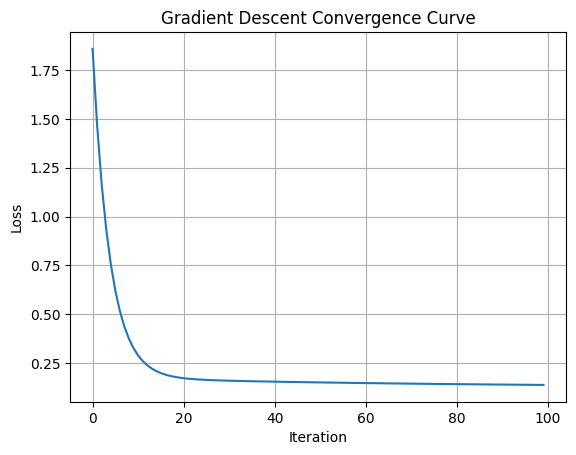

In [1]:
import numpy as np
import matplotlib.pyplot as plt


# 生成模拟数据
def generate_data(num_samples):
    """
    生成模拟的线性回归数据，包含输入特征x和对应的目标值y。

    参数：
    num_samples (int)：要生成的数据样本数量

    返回：
    x (numpy.ndarray)：形状为(num_samples, 1)的输入特征矩阵，添加了偏置项对应的列（全为1）
    y (numpy.ndarray)：形状为(num_samples, 1)的目标值向量
    """
    np.random.seed(0)
    x = np.random.rand(num_samples, 1)
    # 真实的线性关系为 y = 2 * x + 1 ，再加上一些正态分布的噪声
    y = 2 * x + 1 + 0.5 * np.random.randn(num_samples, 1)
    # 在特征矩阵x的最左边添加一列全为1的列，用于对应偏置项
    x = np.c_[np.ones((num_samples, 1)), x]
    return x, y


# 计算损失函数（均方误差）
def compute_loss(x, y, w):
    """
    计算均方误差损失函数。

    参数：
    x (numpy.ndarray)：输入特征矩阵，形状为(num_samples, num_features)
    y (numpy.ndarray)：目标值向量，形状为(num_samples, 1)
    w (numpy.ndarray)：权重向量，形状为(num_features, 1)

    返回：
    loss (float)：计算得到的均方误差损失值
    """
    num_samples = x.shape[0]
    # 根据当前权重w计算预测值
    predictions = np.dot(x, w)
    # 按照均方误差公式计算损失
    loss = np.sum((predictions - y) ** 2) / (2 * num_samples)
    return loss


# 计算梯度
def compute_gradient(x, y, w):
    """
    计算损失函数关于权重的梯度。

    参数：
    x (numpy.ndarray)：输入特征矩阵，形状为(num_samples, num_features)
    y (numpy.ndarray)：目标值向量，形状为(num_samples, 1)
    w (numpy.ndarray)：权重向量，形状为(num_features, 1)

    返回：
    gradient (numpy.ndarray)：计算得到的梯度向量，形状为(num_features, 1)
    """
    num_samples = x.shape[0]
    predictions = np.dot(x, w)
    # 根据梯度计算公式计算梯度
    gradient = np.dot(x.T, (predictions - y)) / num_samples
    return gradient


# 梯度下降算法
def gradient_descent(x, y, learning_rate, num_iterations):
    """
    执行梯度下降算法来优化权重。

    参数：
    x (numpy.ndarray)：输入特征矩阵，形状为(num_samples, num_features)
    y (numpy.ndarray)：目标值向量，形状为(num_samples, 1)
    learning_rate (float)：学习率，控制每次权重更新的步长
    num_iterations (int)：迭代次数，即权重更新的轮数

    返回：
    w (numpy.ndarray)：经过指定次数迭代后优化得到的权重向量，形状为(num_features, 1)
    loss_history (list)：每次迭代后的损失函数值组成的列表
    """
    num_samples, num_features = x.shape
    # 初始化权重向量为全0向量
    w = np.zeros((num_features, 1))
    loss_history = []
    for _ in range(num_iterations):
        gradient = compute_gradient(x, y, w)
        w -= learning_rate * gradient
        loss = compute_loss(x, y, w)
        loss_history.append(loss)
    return w, loss_history


# 主程序
if __name__ == "__main__":
    num_samples = 100
    learning_rate = 0.1
    num_iterations = 100
    x, y = generate_data(num_samples)
    final_weights, loss_history = gradient_descent(x, y, learning_rate, num_iterations)
    plt.plot(range(num_iterations), loss_history)
    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    plt.title('Gradient Descent Convergence Curve')
    plt.grid(True)  # 添加网格线，使图像更清晰美观
    plt.show()

An error occurred during iteration: module 'numpy' has no attribute 'asscalar'
Added penalty value 13.0 at index 0
After gradient descent, x_history length: 1, penalty_values length: 1


ValueError: x and y must have same first dimension, but have shapes (101,) and (1,)

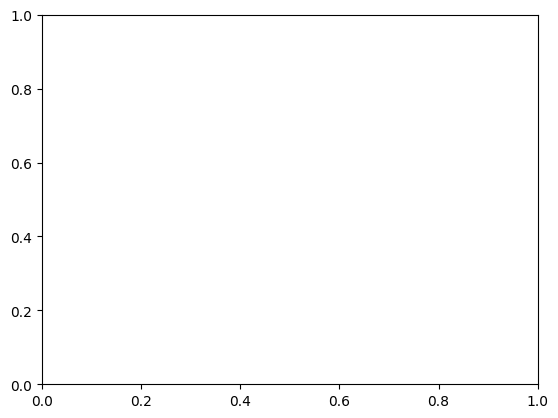

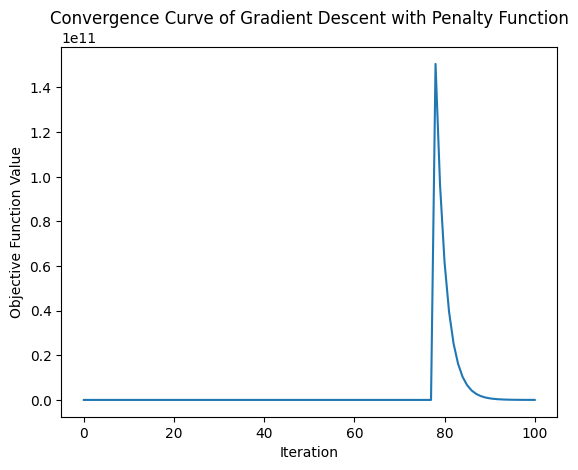

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# 定义目标函数
def objective(x):
    return x ** 2

# 定义罚函数
def penalty_function(x, M):
    if x >= 2:
        return x ** 2
    return x ** 2 + M * (2 - x) ** 2

# 定义罚函数的梯度
def gradient(x, M):
    if x >= 2:
        return 2 * x
    return 2 * x - 2 * M * (2 - x)

# 初始参数
x0 = 0
alpha = 0.1
M = 1
n_iter = 100
x_values = [x0]
obj_values = [objective(x0)]

for _ in range(n_iter):
    grad = gradient(x_values[-1], M)
    x_new = x_values[-1] - alpha * grad
    x_values.append(x_new)
    obj_values.append(objective(x_new))
    # 这里可以添加逻辑来更新罚因子M，例如每10次迭代增大M
    if (_ + 1) % 10 == 0:
        M *= 10

# 绘制收敛曲线
plt.plot(range(len(obj_values)), obj_values)
plt.xlabel('Iteration')
plt.ylabel('Objective Function Value')
plt.title('Convergence Curve of Gradient Descent with Penalty Function')
plt.show()

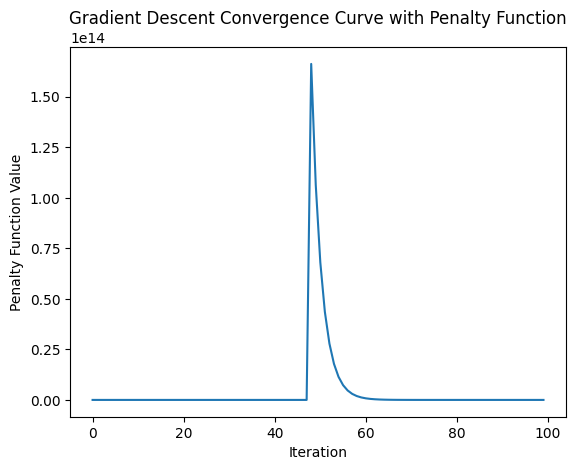

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# 定义罚函数
def penalty_function(x, M):
    if x >= 2:
        return x ** 2
    return x ** 2 + M * (2 - x) ** 2

# 定义罚函数的梯度
def gradient_penalty_function(x, M):
    if x >= 2:
        return 2 * x
    return (2 + 2 * M) * x - 4 * M

# 初始设置
x0 = 0
alpha = 0.1
M = 1
max_iter = 100
iterations = []
penalty_values = []

for i in range(max_iter):
    # 记录当前迭代次数和罚函数值
    iterations.append(i)
    penalty_values.append(penalty_function(x0, M))
    # 计算梯度并更新x
    gradient = gradient_penalty_function(x0, M)
    x0 = x0 - alpha * gradient
    # 可以在这里更新罚因子M，比如增大它
    M = 1.5 * M
plt.plot(iterations, penalty_values)
plt.xlabel('Iteration')
plt.ylabel('Penalty Function Value')
plt.title('Gradient Descent Convergence Curve with Penalty Function')
plt.show()

In [1]:
import numpy as np
from constrained_optimization import QuadraticPenaltyMethod
import matplotlib.pyplot as plt
import math

# 使用beale函数作为目标函数
def objective_function(x):
    #return (1.5 - x[0] + x[0] * x[1])**2 + (2.25 - x[0] + x[0] * x[1]**2)**2 + (2.625 - x[0] + x[0]*(x[1]**3))**2
    #return ((1+(x[0]+x[1]+1)**2*(19-14*x[0]+3*x[0]**2-14*x[1]+6*x[0]*x[1]+3*x[1]**2)) * (30+(2*x[0]-3*x[1])**2*(18-32*x[0]+12*x[0]**2+48*x[1]-36*x[0]*x[1]+27*x[1]**2)))
    return (x[0] - 1)**2 + (x[1] - 2)**2
    #return (x[0] - 1)**2 + (x[0] - x[1])**2 + (x[1] - x[2])**2
# # 定义约束条件
# def inequality_constraint1(x):
#     # x小于等于4.5
#     return x[0] - 4.5
# def inequality_constraint2(x):
#     # y小于等于4.5
#     return x[1] - 4.5
# def inequality_constraint3(x):
#     # x大于等于-4.5
#     return -x[0] - 4.5
# def inequality_constraint4(x):
#     # y大于等于-4.5
#     return -x[1] - 4.5


# def inequality_constraint1(x):
#     # x小于等于4.5
#     return x[0] - 2
# def inequality_constraint2(x):
#     # y小于等于4.5
#     return x[1] - 2
# def inequality_constraint3(x):
#     # x大于等于-4.5
#     return -x[0] - 2
# def inequality_constraint4(x):
#     # y大于等于-4.5
#     return -x[1] - 2

# 定义不等式约束
def inequality_constraint1(x):
    # x小于等于3
    return x[0] - 3
def inequality_constraint2(x):
    # y小于等于4
    return x[1] - 4
def inequality_constraint3(x):
    # x大于等于0
    return -x[0] 
def inequality_constraint4(x):
    # y大于等于1
    return -x[1] + 1
# 定义等式约束
def equality_constraint(x):
    return 2*x[0] + 3*x[1] - 5

# # 定义不等式约束
# def inequality_constraint1(x):
#     # x小于等于10
#     return x[0] - 10
# def inequality_constraint2(x):
#     # y小于等于10
#     return x[1] - 10
# def inequality_constraint3(x):
#     # z小于等于10
#     return x[2] - 10 
# def inequality_constraint4(x):
#     # x大于等于-10
#     return -x[0] - 10
# def inequality_constraint5(x):
#     # y大于等于-10
#     return -x[1] - 10
# def inequality_constraint6(x):
#     # z大于等于-10
#     return -x[2] - 10
# # 定义等式约束
# def equality_constraint(x):
#     return x[0] * (1 + x[1]**2) + x[2]**4 - 4 - 3 * math.sqrt(2)

# 初始点（3维）
x0 = np.array([1.0]*2)

# 创建优化器
optimizer = QuadraticPenaltyMethod(
    objective_func=objective_function,
    inequality_constraints=[inequality_constraint1, inequality_constraint2, inequality_constraint3, inequality_constraint4],
    equality_constraints=[equality_constraint],
    mu=1.0,
    beta=1.5,
    epsilon=1e-6
)

# 优化
x_opt, f_opt, y = optimizer.optimize(x0)

# 输出结果
print(f"最优解: {x_opt}")
print(f"最优值: {f_opt}")
print(f"不等式约束1违反程度: {inequality_constraint1(x_opt)}")
print(f"不等式约束2违反程度: {inequality_constraint2(x_opt)}")
print(f"等式约束违反程度: {equality_constraint(x_opt)}")

最优解: [0.53846163 1.30769252]
最优值: 0.6923073220062085
不等式约束1违反程度: -2.461538371650911
不等式约束2违反程度: -2.692307484792728
等式约束违反程度: 8.023199917772672e-07


画图测试

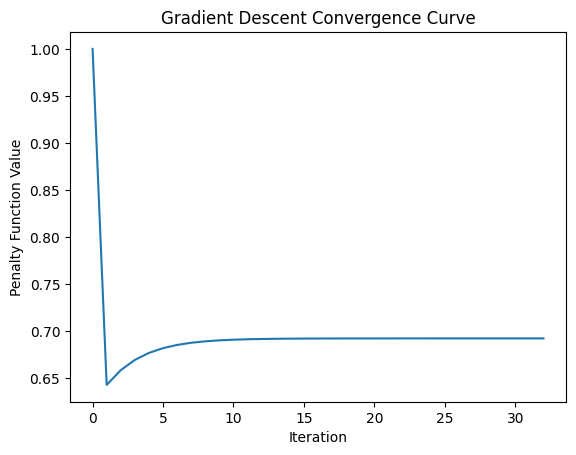

In [3]:
iterations = range(len(y))
plt.plot(iterations, y)
plt.xlabel('Iteration')
plt.ylabel('Penalty Function Value')
plt.title('Gradient Descent Convergence Curve')
plt.show()

d:\github\unconstrained_optimization\constrained_optimization.py:52: RuntimeWarning: invalid value encountered in scalar divide
  penalty_change = abs(prev_penalty - current_penalty) / (abs(prev_penalty) + 1e-10)


最优解: [0.5384616  1.30769258]
最优值: 0.692307258516065
不等式约束1违反程度: -2.461538398582782
不等式约束2违反程度: -2.692307420984136
等式约束违反程度: 9.398820264294727e-07


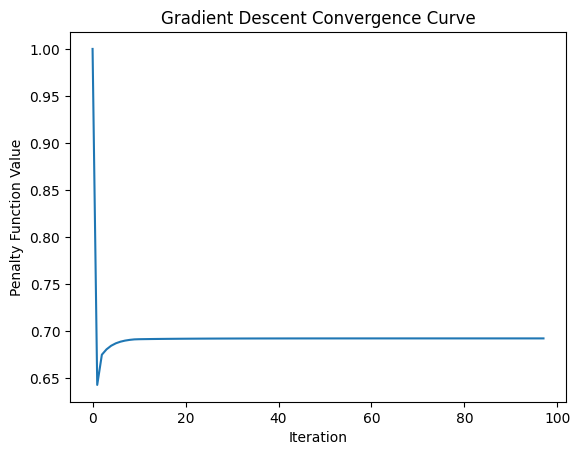

In [1]:
import numpy as np
from constrained_optimization import QuadraticPenaltyMethod
import matplotlib.pyplot as plt
import math

# 使用beale函数作为目标函数
def objective_function(x):
    #return (1.5 - x[0] + x[0] * x[1])**2 + (2.25 - x[0] + x[0] * x[1]**2)**2 + (2.625 - x[0] + x[0]*(x[1]**3))**2
    #return ((1+(x[0]+x[1]+1)**2*(19-14*x[0]+3*x[0]**2-14*x[1]+6*x[0]*x[1]+3*x[1]**2)) * (30+(2*x[0]-3*x[1])**2*(18-32*x[0]+12*x[0]**2+48*x[1]-36*x[0]*x[1]+27*x[1]**2)))
    return (x[0] - 1)**2 + (x[1] - 2)**2
    #return (x[0] - 1)**2 + (x[0] - x[1])**2 + (x[1] - x[2])**2
# # 定义约束条件
# def inequality_constraint1(x):
#     # x小于等于4.5
#     return x[0] - 4.5
# def inequality_constraint2(x):
#     # y小于等于4.5
#     return x[1] - 4.5
# def inequality_constraint3(x):
#     # x大于等于-4.5
#     return -x[0] - 4.5
# def inequality_constraint4(x):
#     # y大于等于-4.5
#     return -x[1] - 4.5


# def inequality_constraint1(x):
#     # x小于等于4.5
#     return x[0] - 2
# def inequality_constraint2(x):
#     # y小于等于4.5
#     return x[1] - 2
# def inequality_constraint3(x):
#     # x大于等于-4.5
#     return -x[0] - 2
# def inequality_constraint4(x):
#     # y大于等于-4.5
#     return -x[1] - 2

# 定义不等式约束
def inequality_constraint1(x):
    # x小于等于3
    return x[0] - 3
def inequality_constraint2(x):
    # y小于等于4
    return x[1] - 4
def inequality_constraint3(x):
    # x大于等于0
    return -x[0] 
def inequality_constraint4(x):
    # y大于等于1
    return -x[1] + 1
# 定义等式约束
def equality_constraint(x):
    return 2*x[0] + 3*x[1] - 5

# # 定义不等式约束
# def inequality_constraint1(x):
#     # x小于等于10
#     return x[0] - 10
# def inequality_constraint2(x):
#     # y小于等于10
#     return x[1] - 10
# def inequality_constraint3(x):
#     # z小于等于10
#     return x[2] - 10 
# def inequality_constraint4(x):
#     # x大于等于-10
#     return -x[0] - 10
# def inequality_constraint5(x):
#     # y大于等于-10
#     return -x[1] - 10
# def inequality_constraint6(x):
#     # z大于等于-10
#     return -x[2] - 10
# # 定义等式约束
# def equality_constraint(x):
#     return x[0] * (1 + x[1]**2) + x[2]**4 - 4 - 3 * math.sqrt(2)

# 初始点（3维）
x0 = np.array([1.0]*2)

# 创建优化器
optimizer = QuadraticPenaltyMethod(
    objective_func=objective_function,
    inequality_constraints=[inequality_constraint1, inequality_constraint2, inequality_constraint3, inequality_constraint4],
    equality_constraints=[equality_constraint],
    mu=1.0,
    beta=1.5,
    epsilon=1e-6
)

# 优化
x_opt, f_opt, y = optimizer.optimize(x0)

# 输出结果
print(f"最优解: {x_opt}")
print(f"最优值: {f_opt}")
print(f"不等式约束1违反程度: {inequality_constraint1(x_opt)}")
print(f"不等式约束2违反程度: {inequality_constraint2(x_opt)}")
print(f"等式约束违反程度: {equality_constraint(x_opt)}")

iterations = range(len(y))
plt.plot(iterations, y)
plt.xlabel('Iteration')
plt.ylabel('Penalty Function Value')
plt.title('Gradient Descent Convergence Curve')
plt.show()

In [2]:
print(len(y))

98
